# Setup

In [1]:
!pip install geopandas

from pathlib import Path
import geopandas as gpd
import numpy as np
from IPython.display import display

# Current working directory
%cd /content/drive/My Drive/unimelb-cluster-and-cloud-computing-comp90024-2020-sm1/city_analytics/geospatial

# Global constants
DATADIR = Path("../geodata")
BASEFILE = DATADIR / "aurin:datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa4_aggregated_pop_and_dwelling_counts_census_2016.json"
STATFILE = DATADIR / "aus_sa4_stats_synthetic.json"  # to build
SEED = 0

     |████████████████████████████████| 931kB 3.6MB/s 
     |████████████████████████████████| 14.7MB 270kB/s 
     |████████████████████████████████| 10.9MB 45.1MB/s 
/content/drive/My Drive/unimelb-cluster-and-cloud-computing-comp90024-2020-sm1/city_analytics/geospatial


# Base data example

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             89 non-null     object  
 1   sa4_code_2016  89 non-null     object  
 2   population     89 non-null     int64   
 3   dwelling       89 non-null     float64 
 4   area_sqkm      89 non-null     float64 
 5   sa4_name       89 non-null     object  
 6   state_name     89 non-null     object  
 7   geometry       89 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 5.7+ KB
None


,id,sa4_code_2016,population,dwelling,area_sqkm,sa4_name,state_name,geometry
0,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa4_aggr...,101,218833,110671.0,51895.5631,Capital Region,New South Wales,"MULTIPOLYGON (((149.91630 -37.07400, 149.91620..."
1,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa4_aggr...,102,327737,144386.0,1681.0724,Central Coast,New South Wales,"MULTIPOLYGON (((151.57270 -33.29070, 151.57140..."
2,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa4_aggr...,103,206164,92830.0,70297.0604,Central West,New South Wales,"POLYGON ((150.14240 -32.34150, 150.16560 -32.3..."
3,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa4_aggr...,104,136246,63414.0,13229.7578,Coffs Harbour - Grafton,New South Wales,"MULTIPOLYGON (((153.14540 -30.30180, 153.14530..."
4,datasource-AU_Govt_ABS-UoM_AURIN_DB_3_sa4_aggr...,105,113712,54295.0,339363.6925,Far West and Orana,New South Wales,"POLYGON ((148.67690 -29.50990, 148.80050 -29.5..."


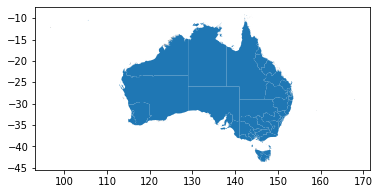

In [2]:
basedata = gpd.read_file(BASEFILE)
print(basedata.info())
display(basedata.head())
basedata.plot()

# Derive statistics

In [5]:
# Synthetic stats
np.random.seed(SEED)
counts = np.random.randint(1000, size=len(basedata.sa4_name))
stats = dict(zip(basedata.sa4_name, counts))
print(stats)

{'Capital Region': 684, 'Central Coast': 559, 'Central West': 629, 'Coffs Harbour - Grafton': 192, 'Far West and Orana': 835, 'Hunter Valley exc Newcastle': 763, 'Illawarra': 707, 'Mid North Coast': 359, 'Murray': 9, 'New England and North West': 723, 'Newcastle and Lake Macquarie': 277, 'Richmond - Tweed': 754, 'Riverina': 804, 'Southern Highlands and Shoalhaven': 599, 'Sydney - Baulkham Hills and Hawkesbury': 70, 'Sydney - Blacktown': 472, 'Sydney - City and Inner South': 600, 'Sydney - Eastern Suburbs': 396, 'Sydney - Inner South West': 314, 'Sydney - Inner West': 705, 'Sydney - North Sydney and Hornsby': 486, 'Sydney - Northern Beaches': 551, 'Sydney - Outer South West': 87, 'Sydney - Outer West and Blue Mountains': 174, 'Sydney - Parramatta': 600, 'Sydney - Ryde': 849, 'Sydney - South West': 677, 'Sydney - Sutherland': 537, 'Ballarat': 845, 'Bendigo': 72, 'Geelong': 777, 'Hume': 916, 'Latrobe - Gippsland': 115, 'Melbourne - Inner': 976, 'Melbourne - Inner East': 755, 'Melbourne - 

# Build stat-geo data

In [6]:
def build(basefile, stats, statname="stat", merge_on="", default=0, filename=""):
  """
  Integrate stats into basefile to make new stat-geo data.
  basefile: file used as base data
  stats: statistical data (dict)
  statname: column name in new data
  merge_on: column name in base data. Defaults to first column
  default: replace for missing values
  filename: to save new data (as .json file). Defaults to returning new data (not saving)
  """

  basedata = gpd.read_file(basefile)
  basedata.dropna(subset=[basedata.geometry.name], inplace=True)  # remove na values from geometry

  # New data
  merge_keys = basedata[merge_on] if merge_on else basedata.iloc[:, 0]
  statvalues = [stats.get(k, default) for k in merge_keys]
  statdata = basedata.assign(**{statname: statvalues})

  if not filename:
    return statdata

  # Export data  
  statdata.to_file(filename, driver="GeoJSON")

  return filename

build(BASEFILE, stats, statname="tweet_count", merge_on="sa4_name", filename=STATFILE)

PosixPath('../geodata/aus_sa4_stats_synthetic.json')